In [226]:
import sympy as sp
import math

In [170]:
x = sp.abc.symbols('x', real='True')
def f(x):
    return 3 * sp.cos(x) ** 2 - sp.sqrt(x)
a, b = 0, 3

In [163]:
f(x)

-sqrt(x) + 3*cos(x)**2

In [185]:
def Newton_method(f, x_0, epsilon=pow(0.1, 6)):
    x_n = -1
    x_prev = x_0 + 2 * epsilon
    while x_n < 0:
        x_n = x_0
        while abs(x_n - x_prev) >= epsilon:
            if x_n < 0:
                break
            x_prev, x_n = x_n, x_n - (sp.diff(f, x).subs(x, x_n) / sp.diff(sp.diff(f, x), x).subs(x, x_n)).evalf()
    return x_n
    

In [213]:
def find_x_0(f, a, b, go_from_left):
    step = (b - a) / 1000
    order_of_the_derivative = 3
    point = a
    if not go_from_left:
        point = b
    x = sp.abc.symbols('x', real='True')
    number_of_positives = 0
    def get_n_derivative(f, n):
        result_f = f
        while n:
            result_f = sp.diff(result_f, x)
            n -= 1
        return result_f
    while  point <= b:
        result_f = get_n_derivative(f(x), 2)
        if (result_f.subs(x, point).is_finite and result_f.subs(x, point) > 0 and sp.diff(result_f, x).subs(x, point).is_finite and (number_of_positive := number_of_positive + 1)) or ((number_of_positive := 0) != 0):
            if number_of_positive > 100:
                return point
        if go_from_left:
            point += step
        else:
            point -= step
    raise Exception("Change 1000 in function find_x_0 to something else.")

In [214]:
go_from_left = True
x_0 = find_x_0(f, a, b, go_from_left)
x_0_alternative = find_x_0(f, a, b, not go_from_left)
print(Newton_method(f(x), x_0))
print(x_0_alternative )
print(Newton_method(f(x), x_0_alternative))

1.63613138418847
2.0609999999999644
1.63613138418847


In [1]:
# 9.2.6
def compute(f, a, b, epsilon):
    next_fib_num, cur_fib_num, prev_fib_num = 3, 2, 1
    number_of_iterations = 0
    while b - a > epsilon:
        delta = b - a
        alpha, beta = a + delta * prev_fib_num / next_fib_num, a + delta * cur_fib_num / next_fib_num
        if f(alpha) <= f(beta):
            a, b = a, beta
        else:
            a, b = alpha, b
        next_fib_num, cur_fib_num, prev_fib_num = next_fib_num + cur_fib_num, cur_fib_num + prev_fib_num, cur_fib_num
        number_of_iterations += 1
    return {"x_min": a, "number_of_iterations": number_of_iterations}


In [2]:
# Initial data
def f(t):
    return (t ** 2 - 3) / (t ** 3  + 2)
a, b, epsilon = -1, 4, 0.001
compute(f, a, b, epsilon)

a:  -1  b:  4
a:  -1  b:  2.3333333333333335
a:  -1  b:  1.0
a:  -1  b:  0.25
a:  -0.5192307692307692  b:  0.25
a:  -0.22619047619047616  b:  0.25
a:  -0.22619047619047616  b:  0.06792717086834738
a:  -0.11389101094983445  b:  0.06792717086834738
a:  -0.04443237969345039  b:  0.06792717086834738
a:  -0.04443237969345039  b:  0.025012064750994073
a:  -0.017906390184628255  b:  0.025012064750994073
a:  -0.017906390184628255  b:  0.008618808754363792
a:  -0.00777463386858703  b:  0.008618808754363792
a:  -0.00777463386858703  b:  0.002357078390784806
a:  -0.0039046623731475685  b:  0.002357078390784806
a:  -0.001512890649462873  b:  0.002357078390784806
a:  -0.001512890649462873  b:  0.0008788816538138552
a:  -0.0005993149463339645  b:  0.0008788816538138552


{'x_min': -0.0005993149463339645, 'number_of_iterations': 18}

In [93]:
# 9.5.16
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
import numpy as np
# Initial data
def foo(arr):
    x, y = arr
    return x ** 2 + 2 * (y ** 2) - 4 * np.sin(x) - np.sin(y)
x1, x2, y1, y2 = -2, 4, -2, 4
# Построение графика функции и поверхностей уровня
def plot_function_and_contours(foo, x1, x2, y1, y2):
    x = np.linspace(x1, x2, 400)
    y = np.linspace(y1, y2, 400)
    X, Y = np.meshgrid(x, y)
    Z = foo([X, Y])

    fig = plt.figure(figsize=(14, 6))
    
    # График поверхности
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(X, Y, Z, cmap='viridis')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('f(X, Y)')
    ax1.set_title('Surface plot of f(x, y)')

    # Контурный график
    ax2 = fig.add_subplot(122)
    contour = ax2.contour(X, Y, Z, levels=50, cmap='viridis')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title('Contour plot of f(x, y)')
    fig.colorbar(contour, ax=ax2, shrink=0.5, aspect=5)

    plt.show()
# Поиск минимума функции с заданной точностью
def find_minimum(x1, x2, y1, y2, foo, initial_guess):
    bounds = [(x1, x2), (y1, y2)]
    
    result = minimize(foo, initial_guess, bounds=bounds, tol=1e-6)
    return result.x, result.fun, result.nit


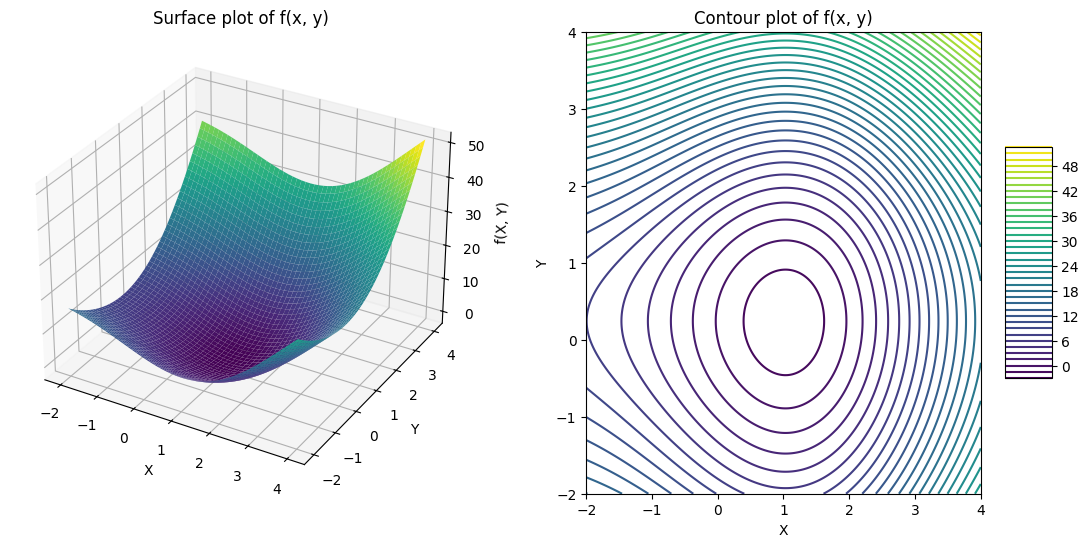

In [30]:
plot_function_and_contours(foo, x1, x2, y1, y2)

In [32]:
optimal_point, value_at_optimal_point, number_of_needed_iterations = find_minimum(x1, x2, y1, y2, foo, [1, 0])

In [105]:
from sympy import diff, symbols,exp
from sympy import lambdify
def foo(x, y):
    return x * x - x * y + 5 * y * y - 2.5 * x - 3.5 * y
f = lambdify(((x, y),), foo(x, y))
drv_foo_x = sp.diff(foo(x, y), x)
drv_foo_y = sp.diff(foo(x, y), y)
derivative_of_f_with_respect_to_x = lambdify(((x, y)), drv_foo_x)
derivative_of_f_with_respect_to_y = lambdify(((x, y)), drv_foo_y)

In [106]:
# This function calculates alpha which can reach minimun of f(x + alpha * h)
# (x_k, y_k) - coordinates. (h_x, h_y) are coodinates of h vector on k step. h_k = -derivative_of_f(x_k) + beta_{k - 1} * h_{k - 1} //Latex style
def find_min_alpha_for_Nonlinear_conjugate_gradient_method(x_k, y_k, h_x, h_y, foo, epsilon):
    t = symbols("t")
    new_f = foo(x_k + t * h_x, y_k + t * h_y)
    drv_foo_t = sp.diff(new_f, t)
    drv_drv_foo_t = sp.diff(drv_foo_t, t)
    derivative_of_f_with_respect_to_t = lambdify(((t),), drv_foo_t)
    second_derivative_of_f_with_respect_to_t = lambdify(((t),), drv_drv_foo_t)
    t_n = 2 * epsilon
    t_prev = 0
    while abs(t_n - t_prev) >= epsilon:
        t_prev, t_n = t_n, t_n - derivative_of_f_with_respect_to_t(t_n) / second_derivative_of_f_with_respect_to_t(t_n)
    return t_n


h = [] # Array which will contain all h vectors.
# This function calculates h_k. (x_k, y_k) - coordinates. beta_prev is a beta on k - 1 step. k is a number of  step.
# return h_k on k step
def find_h_k(k, x_k, y_k, beta_prev):
    if len(h) == 0:
        h.append([ -derivative_of_f_with_respect_to_x(x_k, y_k), -derivative_of_f_with_respect_to_y(x_k, y_k)])
    if k + 1 <= len(h):
        return h[k]
    h.append([ -derivative_of_f_with_respect_to_x(x_k, y_k) + beta_prev * h[-1][0], -derivative_of_f_with_respect_to_y(x_k, y_k)] + beta_prev * h[-1][1])
    return h[-1]


# This function calculates beta on k step. (x_k_plus_1, y_k_plus_1) are coordinates of the vector x on k + 1 step
# return beta on k step
def find_beta_k(k, x_k_plus_1, y_k_plus_1):
    # If we represent initial function f as (1/2) (A z, z) + (b, z) + c = 0 where z = (x, y), then we can write the values to which A and b are equal
    A = np.array([[20, 0],
                  [0, 12]])
    b = np.array([-8, 12])
    derivative_of_f = np.array([ derivative_of_f_with_respect_to_x(x_k_plus_1, y_k_plus_1), derivative_of_f_with_respect_to_y(x_k_plus_1, y_k_plus_1)])
    return (np.matmul(np.matmul(A, h[k -1]), derivative_of_f)) / (np.matmul(np.matmul(A, h[k - 1]), h[k - 1]))


#This function calculates approximate coordinates of global minimum with tolerance of 0.01 via Nonlinear conjugate gradient method.
#Returns [x, y, amount of iterations that was needed, number of iteration where algorithm stopped, name of the algorithm]
def Nonlinear_conjugate_gradient_method(x_0, y_0, foo): # Метод сопряженных градиентов
    betas = [0] # array for storing beta_k
    x_cur = x_0 # x coordinate of the current point
    y_cur = y_0 # y coordinate of the current point
    for k in range(0, 2): # Only two iterations needed to calculate the approximate coordinates of global minimum with tolerance of 0.01.
                          # It is reasonable because it is based on theory which state that amount of steps needed to find global minimum is equal to dimension of space
                          # In this case R^2 is two dimensional space so the number 2 here is objectively choosen.
        h_k = find_h_k(k, x_cur, y_cur, betas[k])
        alpha = find_min_alpha_for_Nonlinear_conjugate_gradient_method(x_cur, y_cur, h_k[0], h_k[1], foo, 0.00001)
        x_cur = x_cur + alpha * h_k[0]
        y_cur = y_cur + alpha * h_k[1]
        betas.append(find_beta_k(k + 1, x_cur, y_cur))
    return [x_cur, y_cur, 2, 3, "Nonlinear conjugate gradient method"]




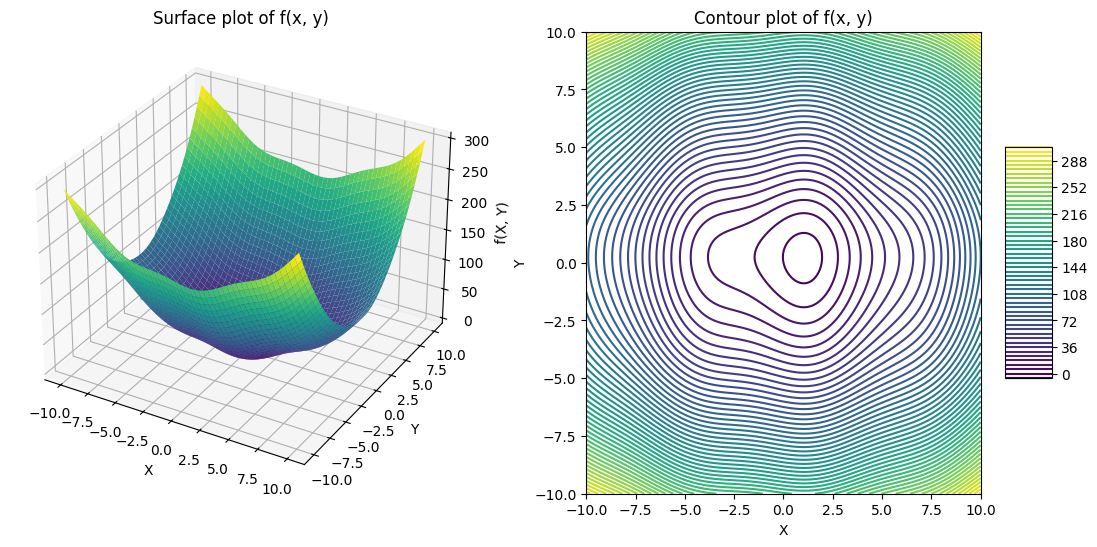

In [95]:
plot_function_and_contours(foo, -10, 10, -10, 10)

In [107]:
Nonlinear_conjugate_gradient_method(1.0, 1.0, foo)

NameError: name 'x_0' is not defined